In [1]:
# Import nesessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Load data from pickle
df = pd.read_pickle("Loan_status.pkl")

In [4]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3

In [5]:
# Read the file 
# df = pd.read_csv("Loan_status_2007-2020Q3.gzip", on_bad_lines="skip", low_memory=False)

In [6]:
# Save file to pickle to save time
# df.to_pickle("Loan_status.pkl")

# Split Dataset into Training, Validation, Testing and Untouched Sets

In [7]:
'''
## Split Dataset
from sklearn.model_selection import train_test_split

# Step 1: Split off untouched data (10%)
df_train_val, df_untouched = train_test_split(df, test_size=0.10, random_state=42)
df_train_val = df_train_val.copy()  # Avoid SettingWithCopyWarning
df_untouched = df_untouched.copy()
df_untouched["set_flag"] = 0  # Mark untouched

# Step 2: Split remaining into train (50%), validation (20%), and test (20%)
df_train, df_temp = train_test_split(df_train_val, test_size=0.40, random_state=42)
df_train = df_train.copy()
df_temp = df_temp.copy()
df_train["set_flag"] = 1  # Mark train

df_val, df_test = train_test_split(df_temp, test_size=0.50, random_state=42)
df_val = df_val.copy()
df_test = df_test.copy()
df_val["set_flag"] = 2  # Mark validation
df_test["set_flag"] = 3  # Mark test

# Combine all subsets back into one dataframe
df_final = pd.concat([df_train, df_val, df_test, df_untouched], ignore_index=True)

# Save as Parquet for efficient storage
df_final.to_parquet("dataset_with_flags.parquet", index=False)

# Check dataset sizes
print(f"Training Set: {len(df_train)} rows ({len(df_train)/len(df)*100:.1f}%)")
print(f"Validation Set: {len(df_val)} rows ({len(df_val)/len(df)*100:.1f}%)")
print(f"Test Set: {len(df_test)} rows ({len(df_test)/len(df)*100:.1f}%)")
print(f"Untouched Set: {len(df_untouched)} rows ({len(df_untouched)/len(df)*100:.1f}%)")

print("Data saved with set_flag column.")
'''

'\n## Split Dataset\nfrom sklearn.model_selection import train_test_split\n\n# Step 1: Split off untouched data (10%)\ndf_train_val, df_untouched = train_test_split(df, test_size=0.10, random_state=42)\ndf_train_val = df_train_val.copy()  # Avoid SettingWithCopyWarning\ndf_untouched = df_untouched.copy()\ndf_untouched["set_flag"] = 0  # Mark untouched\n\n# Step 2: Split remaining into train (50%), validation (20%), and test (20%)\ndf_train, df_temp = train_test_split(df_train_val, test_size=0.40, random_state=42)\ndf_train = df_train.copy()\ndf_temp = df_temp.copy()\ndf_train["set_flag"] = 1  # Mark train\n\ndf_val, df_test = train_test_split(df_temp, test_size=0.50, random_state=42)\ndf_val = df_val.copy()\ndf_test = df_test.copy()\ndf_val["set_flag"] = 2  # Mark validation\ndf_test["set_flag"] = 3  # Mark test\n\n# Combine all subsets back into one dataframe\ndf_final = pd.concat([df_train, df_val, df_test, df_untouched], ignore_index=True)\n\n# Save as Parquet for efficient storage\

In [8]:
# Dimension of training set
df.shape

(2925493, 142)

# Data Processing

## 1. Drop features with > 50% missing values

In [9]:
## Drop features with > 50% missing values
missing_percent = (df.isna().sum() / len(df))* 100
cols_to_drop = missing_percent[missing_percent > 50].index
print(cols_to_drop)
df_dropped = df.drop(columns=cols_to_drop)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object')


In [10]:
# Identify columns with string (object) content
string_columns = df_dropped.select_dtypes(include=['object']).columns.tolist()

# Display the list of column names containing string content
string_columns

['id',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'debt_settlement_flag']

# Categorize Predictor Variable to Loss, Good and Other

In [11]:
# create categories for loan status
loss = ['Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default']
good = ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Charged Off', 'Issued']
df_dropped['loan_category'] = df_dropped['loan_status'].apply(lambda x: 'Loss' if x in loss else ('Good' if x in good else 'Other'))

In [12]:
# filter only good and loss
df_dropped = df_dropped[df_dropped['loan_category'].isin(['Loss', 'Good'])]
# convert to numerical encoding
df_dropped['loan_cat_numerical'] = df_dropped['loan_category'].map({'Loss': 0, 'Good': 1})
df_dropped['loan_cat_numerical'].value_counts()

loan_cat_numerical
1    2530861
0     363742
Name: count, dtype: int64

# Convert String to Numeric

## 1. Convert id to numeric

In [13]:
## convert id to numeric
df_dropped['id'] = pd.to_numeric(df_dropped['id'], errors='coerce').astype('Int64')
# check if there'are any NAs
df_dropped['id'].isna().any()
df_dropped['id'].isna().sum()

# show the column with NA id
df_dropped[df_dropped['id'].isna()]

# drop the entire row 39786 because it's empty
df_dropped.shape

(2894603, 109)

In [14]:
# check result
df_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,May-2020,704.0,700.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,499.0,0.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Loss,0
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,739.0,735.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67

## 2. Convert emp_title to Numeric (Drop)

Reasons to drop feature emp_title:

1. High cardinality -- 372,749 unique values in 1,579,764 rows (~24% unique), making it difficult to extract meaningful patterns.
2. Encoding challenge -- One-hot encoding is impractical due to excessive feature expansion; label encoding introduces arbitrary ordinal relationships

In [15]:
## Drop emp_title column (too many distinct emp_titles)
df_dropped.drop(columns=["emp_title"], inplace=True)

df_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,May-2020,704.0,700.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,499.0,0.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Loss,0
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,739.0,735.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified

## 3. Convert home_ownership to Numerical (One-hot Encoding)

In [16]:
## Convert home_ownership into numerical
df_dropped['home_ownership'].unique()

df_dropped['home_ownership'].isnull().sum()

# perform one-hot encoding 
df_dropped = pd.get_dummies(df_dropped, columns=['home_ownership'], drop_first=False)

# convert the true/false into 1/0
home_ownership_cols = [col for col in df_dropped.columns if col.startswith('home_ownership_')]
df_dropped[home_ownership_cols] = df_dropped[home_ownership_cols].astype(int)
df_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,May-2020,704.0,700.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1,0,0,0,0,0,1
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,499.0,0.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Loss,0,0,0,0,0,0,1
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,739.0,735.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1,0,0,0,0,0,1
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0

## 4. Convert verification_status to Numerical (One-hot Encoding)

In [17]:
## convert verification_status
df_dropped['verification_status'].unique()
df_dropped['verification_status'].isnull().sum()

# one-hot encoding 
df_dropped = pd.get_dummies(df_dropped, columns=['verification_status'], drop_first=False)

# convert true/false to 1/0
verification_status_cols = [col for col in df_dropped.columns if col.startswith('verification_status_')]
df_dropped[verification_status_cols] = df_dropped[verification_status_cols].astype(int)
df_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,24000.0,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,May-2020,704.0,700.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1,0,0,0,0,0,1,0,0,1
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,30000.0,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,499.0,0.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Loss,0,0,0,0,0,0,1,0,1,0
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,12252.0,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,739.0,735.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1,0,0,0,0,0,1,1,0,0
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,49200.0,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## 5. Convert issue_d to Numerical 

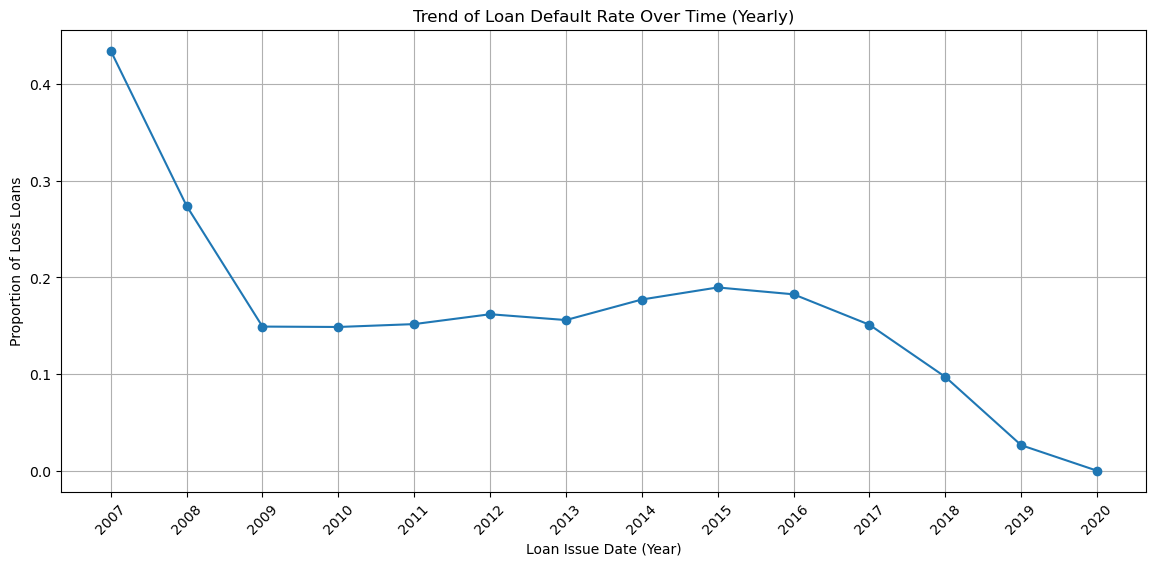

In [18]:
## convert issue_d
df_dropped['issue_d'].head()

df_dropped['issue_d'].isnull().sum()

df_dropped['loan_status'].unique()

# Convert issue_d to datetime
df_dropped['issue_d'] = pd.to_datetime(df_dropped['issue_d'], format='%b-%Y')
# Group by month-year and calculate the proportion of "loss" loans
loss_rate = df_dropped.groupby(df_dropped['issue_d'].dt.to_period('Y'))['loan_category'].apply(lambda x: (x == 'Loss').mean())

# Plot the trend
plt.figure(figsize=(14, 6))
#x_labels = loss_rate.index.astype(str)[::4]  # Show every 4th label
plt.plot(loss_rate.index.astype(str), loss_rate.values, marker='o', linestyle='-')
#plt.xticks(ticks=x_labels, rotation=45)
plt.xticks(rotation=45)
plt.xlabel("Loan Issue Date (Year)")
plt.ylabel("Proportion of Loss Loans")
plt.title("Trend of Loan Default Rate Over Time (Yearly)")
plt.grid(True)
plt.show()

In [19]:
# convert issue_d to an Ordinal Feature
df_dropped['issue_d_ordinal'] = df_dropped['issue_d'].dt.year - df_dropped['issue_d'].dt.year.min()
df_dropped.drop(columns=['issue_d'], inplace=True)  # Drop original datetime column

## 6. Convert url to Numeric (Drop)
Reason to drop url: 
1. url unaccessible

In [20]:
## loanDetails that requires investor account to login (Unaccessible)
## Drop column
df_dropped.drop(columns=["url"], inplace=True)

df_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_ordinal
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,24000.0,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,May-2020,704.0,700.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1,0,0,0,0,0,1,0,0,1,4
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,30000.0,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,499.0,0.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Loss,0,0,0,0,0,0,1,0,1,0,4
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,12252.0,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,739.0,735.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1,0,0,0,0,0,1,1,0,0,4
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,49200.0,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1,0,0,0,0,0,1,0,1,0,4
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,80000.0,Fully Paid,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.

## 7. Convert Term to Numeric

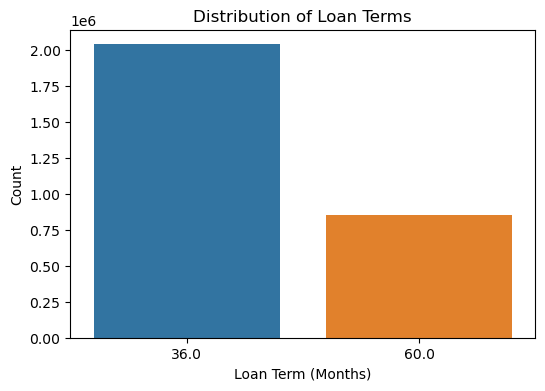

In [21]:
# Check feature Term and convert to numeric
df_dropped["term"].unique()

# Convert  numeric 
df_dropped["term"] = df_dropped["term"].str.extract("(\d+)").astype(float)

# Plot distribution of loan terms
plt.figure(figsize=(6,4))
sns.countplot(x=df_dropped["term"])
plt.title("Distribution of Loan Terms")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

## 8. Convert int_rate to Numeric

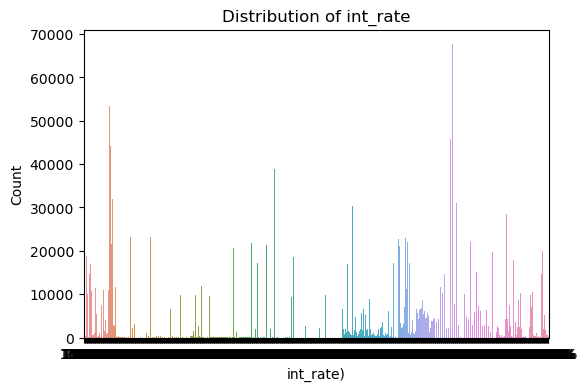

0    0.1065
1    0.1527
2    0.1596
3    0.1349
4    0.1269
Name: int_rate, dtype: float64

In [22]:
# Check feature int_rate and convert to numeric
df_dropped["int_rate"].unique()

# Plot distribution of int_rate
plt.figure(figsize=(6,4))
sns.countplot(x=df_dropped["int_rate"])
plt.title("Distribution of int_rate")
plt.xlabel("int_rate)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Convert
df_dropped["int_rate"] = df_dropped["int_rate"].replace("nan", np.nan)
df_dropped["int_rate"] = df_dropped["int_rate"].str.replace("%", "").astype(float) / 100
df_dropped["int_rate"].head()

## 9. Convert sub_grade to Numeric (Drop grade)

0


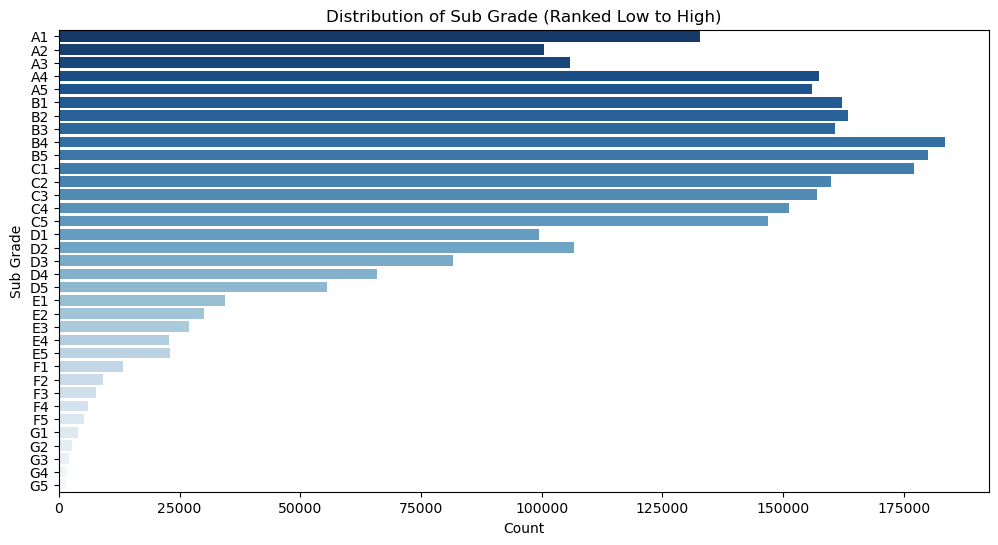

In [23]:
# Check feature grade and subgrade
df_dropped["grade"].unique()
df_dropped["sub_grade"].unique()

# Possible feature engineering: Combine into one feature A=1, B=2, C=3, D=4, E=5, F=6, G=7 (Smaller number has lower risk)===> 
# Use only converted sub_grade, drop feature grade
df_dropped = df_dropped.drop(["grade"], axis=1)

# Define base values for grades (lower = better credit, higher = higher risk)
grade_mapping = {"A" :1, "B" : 2, "C" : 3, "D" : 4, "E" : 5, "F" : 6, "G" : 7}

# Convert nan to np.nan
df_dropped["sub_grade"] = df_dropped["sub_grade"].replace("nan", np.nan)

# Check if has nan valus (1 nan)
df_dropped["sub_grade"].isna().sum()

# Check if the original "nan" value converted to np.nan (All converted)
print((df_dropped["sub_grade"] == "nan").sum())

# Plot the distribution of sub_grade with proper ranking from low to high
plt.figure(figsize=(12, 6))
sns.countplot(y=df_dropped["sub_grade"], order=sorted(df_dropped["sub_grade"].unique()), palette="Blues_r")
plt.title("Distribution of Sub Grade (Ranked Low to High)")
plt.xlabel("Count")
plt.ylabel("Sub Grade")
plt.show()


# Convert sub_grade into an ordered numeric feature where A1 is lowest risk and G5 is highest risk
df_dropped["sub_grade"] = df_dropped["sub_grade"].apply(lambda x: grade_mapping[str(x)[0]] * 10 + int(str(x)[1]) if pd.notna(x) else np.nan)

## 10. Convert emp_length to Numeric

In [24]:
# Check feature emp_length
df_dropped["emp_length"].unique()

def convert_emp_length(emp):
    if pd.isna(emp):  # Handle missing values
        return np.nan
    if emp == "10+ years":
        return 10
    elif emp == "< 1 year":
        return 0
    else:
        return int(emp.split()[0])  # Extract the number from "X years"
## Check below for convertion criterion


## Convert emp_length to numeric
df_dropped["emp_length"] = df_dropped["emp_length"].apply(convert_emp_length)

In [25]:
# Handeling 'purpose', 'title', 'zip_code', 'addr_state',

df_dropped["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

## 11. Convert Purpose to Numeric


In [26]:
# Convert "purpose" from string to numeric
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'purpose' column
df_dropped["purpose"] = le.fit_transform(df_dropped["purpose"])

# View unique mappings
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3, 'home_improvement': 4, 'house': 5, 'major_purchase': 6, 'medical': 7, 'moving': 8, 'other': 9, 'renewable_energy': 10, 'small_business': 11, 'vacation': 12, 'wedding': 13}


## 12.Convert Title to Numeric (Drop)

In [27]:
# Convert 'title' from strings to numeric (Since similar to "Purpose, drop it")
num_unique_titles = df_dropped["title"].nunique()
title_counts = df_dropped["title"].value_counts()
purpose_counts = df_dropped["purpose"].value_counts()

df_dropped = df_dropped.drop(columns=["title"])

## 13. Convert zip_code, addr_state to Numeric(Drop)

In [28]:
# Convert "zip_code" to numeric
df_dropped["zip_code"].unique()

# Drop zip_code
df_dropped = df_dropped.drop(columns=["zip_code"])

# Drop "addr_state"
df_dropped["addr_state"].unique()
df_dropped = df_dropped.drop(columns=["addr_state"])

## 14. Convert hardship_flag to Numeric (Categorical{0,1})

In [29]:
# Map 'N' to 0 and 'Y' to 1
df_dropped["hardship_flag"] = df_dropped["hardship_flag"].map({
                                                                          "N": 0, "Y": 1})

df_dropped["hardship_flag"].unique()

array([ 0.,  1., nan])

## 15. Convert debt_settlement_flag to Numeric (Categorical{0,1})

In [30]:
# Map 'N' to 0 and 'Y' to 1
df_dropped["debt_settlement_flag"] = df_dropped["debt_settlement_flag"].map({
                                                                                        "N": 0, "Y": 1})

df_dropped["debt_settlement_flag"].unique()

array([0, 1])

## 16. Convert application_type to Numeric

In [31]:
# Map 'Individual' to 0 and 'Joint App' to 1
df_dropped["application_type"] = df_dropped["application_type"].map(
    {"Individual": 0, "Joint App": 1})

df_dropped["application_type"].unique()

array([0, 1])

## 17. Convert last_credit_pull_d to Numeric
Convert date to a numeric measure of recency in days (reference date - credit pull date; smaller is worse)

Reference Date: September 30, 2020 because the dataset appears to be as recent as Q3 2020.

In [32]:
df_dropped["last_credit_pull_d"] = pd.to_datetime(
    df_dropped["last_credit_pull_d"])

# Define reference date as the end of Q3 2020
reference_date = pd.to_datetime("2020-09-30")

df_dropped["last_credit_pull_d"] = (
    reference_date - df_dropped["last_credit_pull_d"]).dt.days

df_dropped["last_credit_pull_d"].head()

/var/folders/1k/m19_s5vj13nd1vhzx_rcdr780000gn/T/ipykernel_19996/1684556294.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dropped["last_credit_pull_d"] = pd.to_datetime(


0     152.0
1    1460.0
2    1217.0
3    1643.0
4     913.0
Name: last_credit_pull_d, dtype: float64

## 18. Convert earliest_cr_line to Numeric
In credit scoring models (e.g., FICO score), one of the key factors is the length of credit history, which refers to how long the borrower has had a credit account. Lenders care about how long you have had credit not the exactly date.

In [33]:
df_dropped["earliest_cr_line"].unique()

array(['Jan-1985', 'Apr-1999', 'Nov-2001', 'Feb-1996', 'Jan-1996',
       'Nov-2004', 'Jul-2005', 'Jan-2007', 'Apr-2004', 'Sep-2004',
       'Jan-1998', 'Oct-1989', 'Jul-2003', 'May-1991', 'Sep-2007',
       'Oct-1998', 'Aug-1993', 'Oct-2003', 'Jan-2001', 'Nov-1997',
       'Feb-1983', 'Jul-1985', 'Apr-2003', 'Jun-2001', 'Feb-2002',
       'Aug-1984', 'Nov-2006', 'Dec-1987', 'Nov-1981', 'Feb-1997',
       'Apr-2005', 'Oct-2007', 'Dec-2000', 'Apr-2007', 'Dec-2001',
       'Jan-2003', 'Mar-1994', 'Sep-1998', 'Jun-2004', 'Nov-1995',
       'Jul-1999', 'Jun-1995', 'Sep-1992', 'Jan-2002', 'Apr-1992',
       'Oct-2006', 'May-2000', 'Dec-1998', 'Dec-2004', 'Oct-2000',
       'May-2002', 'May-2006', 'Jul-2002', 'Jul-2006', 'May-1997',
       'Oct-2005', 'Apr-1995', 'Oct-2002', 'Jan-2000', 'Apr-2000',
       'Dec-1994', 'Sep-2005', 'Dec-1984', 'Dec-1999', 'Nov-2003',
       'Jun-1989', 'Jun-2003', 'Oct-1996', 'May-2003', 'Jun-2002',
       'Jun-2007', 'Dec-1996', 'Feb-1984', 'Sep-2002', 'Jan-19

In [34]:
from datetime import datetime
df_dropped["earliest_cr_line"] = pd.to_datetime(df_dropped["earliest_cr_line"], format="%b-%Y")
df_dropped["earliest_cr_line"] = (
    (datetime.today().year - df_dropped["earliest_cr_line"].dt.year) * 12 +
    (datetime.today().month - df_dropped["earliest_cr_line"].dt.month)
)

In [35]:
df_dropped["earliest_cr_line"].unique()

array([ 482.,  311.,  280.,  349.,  350.,  244.,  236.,  218.,  251.,
        246.,  326.,  425.,  260.,  406.,  210.,  317.,  379.,  257.,
        290.,  328.,  505.,  476.,  263.,  285.,  277.,  487.,  220.,
        447.,  520.,  337.,  239.,  209.,  291.,  215.,  279.,  266.,
        372.,  318.,  249.,  352.,  308.,  357.,  390.,  278.,  395.,
        221.,  298.,  315.,  243.,  293.,  274.,  226.,  272.,  224.,
        334.,  233.,  359.,  269.,  302.,  299.,  363.,  234.,  483.,
        303.,  256.,  429.,  261.,  341.,  262.,  273.,  213.,  339.,
        493.,  270.,  470.,  322.,  338.,  237.,  421.,  252.,  356.,
        367.,  393.,  336.,  227.,  419.,  307.,  294.,  289.,  435.,
        313.,  399.,  295.,  245.,  247.,  241.,  232.,  292.,  214.,
        410.,  297.,  223.,  267.,  381.,  225.,  253.,  411.,  300.,
        361.,  284.,  275.,  222.,  310.,  319.,  231.,  250.,  281.,
        501.,  468.,  539.,  248.,  200.,  346.,  254.,  268.,  271.,
        283.,  408.,

## 19. Convert revol_util to Numeric

In [36]:
df_dropped["revol_util"].unique()

array(['83.7%', '9.4%', '98.5%', ..., '116.2%', '123.4%', '125.2%'],
      dtype=object)

In [37]:
df_dropped["revol_util"] = pd.to_numeric(df_dropped["revol_util"].str.rstrip("%"), errors="coerce") / 100

## 20. Convert initial_list_status to Numeric

In [38]:
# Map 'w' to 0 and 'f' to 1
df_dropped["initial_list_status"] = df_dropped["initial_list_status"].map({"w": 0, "f": 1})

In [39]:
df_dropped["initial_list_status"].unique()

array([1, 0])

## 21. Convert last_pymnt_d to Numeric
Months Since Last Payment = (Current Year − Last Payment Year) × 12 + (Current Month − Last Payment Month)

In [40]:
from datetime import datetime
import pandas as pd

# Ensure the column is in datetime format
df_dropped["last_pymnt_d"] = pd.to_datetime(df_dropped["last_pymnt_d"], errors='coerce')

# Calculate months since last payment
df_dropped["months_since_last_pymnt"] = (
    (datetime.today().year - df_dropped["last_pymnt_d"].dt.year) * 12 +
    (datetime.today().month - df_dropped["last_pymnt_d"].dt.month)
)

/var/folders/1k/m19_s5vj13nd1vhzx_rcdr780000gn/T/ipykernel_19996/588528723.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dropped["last_pymnt_d"] = pd.to_datetime(df_dropped["last_pymnt_d"], errors='coerce')


In [41]:
df_dropped["months_since_last_pymnt"].unique()

array([122., 143., 129.,  98., 106., 155., 148., 141., 138., 152., 137.,
       142., 121., 115., 149., 150.,  nan, 147., 123., 139., 136., 134.,
       131., 127., 125., 151., 128., 140., 110., 109., 119., 133., 126.,
       153., 145., 105., 144., 130., 120., 146., 135., 157., 132., 114.,
       112., 108., 158., 113.,  99., 124., 156., 154., 103., 104., 101.,
       111., 117.,  97., 102., 100., 118., 116., 107.,  95., 159., 160.,
       161., 162., 163., 164., 165., 166., 167., 168., 169., 170., 171.,
       172., 173., 174., 175., 176., 177., 178., 179., 180., 181., 182.,
       183., 184., 185., 186., 187., 188., 189., 190., 191., 192., 193.,
       194., 195., 197., 199., 200., 198., 201., 202., 196., 203., 204.,
       205., 206., 207.,  90.,  80.,  73.,  93.,  82.,  74.,  94.,  89.,
        79.,  96.,  76.,  85.,  92.,  77.,  84.,  88.,  75.,  86.,  78.,
        83.,  87.,  81.,  91.,  72.,  70.,  71.,  58.,  65.,  63.,  59.,
        62.,  64.,  67.,  60.,  61.,  66.,  68.,  6

In [42]:
# Check df after column dropping
df_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_ordinal,months_since_last_pymnt
0,0,1077501,5000.0,5000.0,4975.0,36.0,0.1065,162.87,22,10.0,24000.0,Fully Paid,n,1,27.65,0.0,482.0,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,1,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,2015-01-01,171.62,152.0,704.0,700.0,0.0,1.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,Good,1,0,0,0,0,0,1,0,0,1,4,122.0
1,1,1077430,2500.0,2500.0,2500.0,60.0,0.1527,59.83,34,0.0,30000.0,Charged Off,n,0,1.00,0.0,311.0,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,1,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,2013-04-01,119.66,1460.0,499.0,0.0,0.0,1.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,Loss,0,0,0,0,0,0,1,0,1,0,4,143.0
2,2,1077175,2400.0,2400.0,2400.0,36.0,0.1596,84.33,35,10.0,12252.0,Fully Paid,n,11,8.72,0.0,280.0,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,1,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,2014-06-01,649.91,1217.0,739.0,735.0,0.0,1.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,Good,1,0,0,0,0,0,1,1,0,0,4,129.0
3,3,1076863,10000.0,10000.0,10000.0,36.0,0.1349,339.31,31,10.0,49200.0,Fully Paid,n,9,20.00,0.0,349.0,690.0,694.0,1.0,10.0,0.0,5598.0,0.210,37.0,1,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,2015-01-01,357.48,1643.0,604.0,600.0,0.0,1.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,Good,1,0,0,0,0,0,1,0,1,0,4,122.0
4,4,1075358,3000.0,3000.0,3000.0,60.0,0.1269,67.79,25,1.0,80000.0,Fully Paid,n,9,17.94,0.0,350.0,695.0,699.0,0.0,15.0,0.0,27783.0,0.539,38.0,1,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,2017-01-01,67.30,913.0,684.0,680.0,0.0,1.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [43]:
# Select only numeric features before computing correlation
df_numeric = df_dropped.select_dtypes(include=["number"])  # Keep only numeric columns

# Compute correlations with target
correlations = df_numeric.corr()["loan_cat_numerical"].dropna().sort_values(ascending=False)

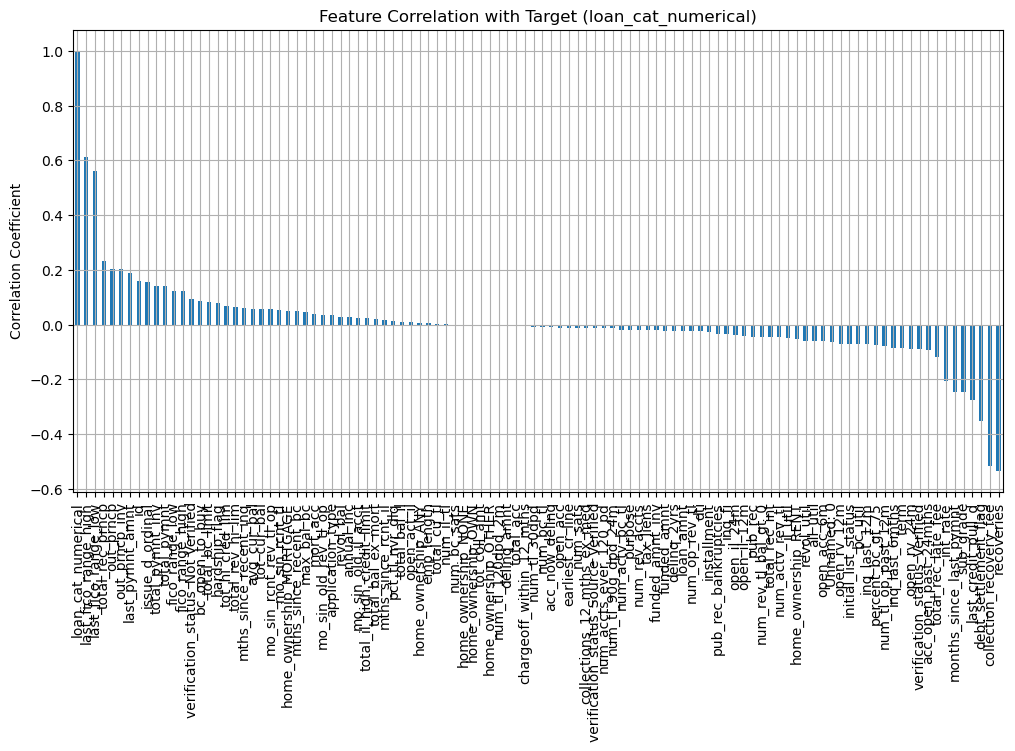

In [44]:
# Plot correlations
plt.figure(figsize=(12, 6))
correlations.plot(kind="bar")
plt.title("Feature Correlation with Target (loan_cat_numerical)")
plt.ylabel("Correlation Coefficient")
plt.grid()
plt.show()

# use the entire training dataset (df_train_dropped) for model training

In [45]:
'''
import pickle
from sklearn.model_selection import train_test_split

# Step 1: Select exactly 60,000 rows from df_train_dropped
df_selected = df_train_dropped.sample(n=1000000, random_state=42)  # Ensures reproducibility

# Step 2: Split selected data into train (60%), validation (20%), and test (20%)
df_train, df_temp = train_test_split(df_selected, test_size=0.40, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.50, random_state=42)

# Print dataset distribution
print(f"Training Set: {len(df_train)} rows ({len(df_train)/len(df_selected)*100:.1f}%)")
print(f"Validation Set: {len(df_val)} rows ({len(df_val)/len(df_selected)*100:.1f}%)")
print(f"Test Set: {len(df_test)} rows ({len(df_test)/len(df_selected)*100:.1f}%)")
'''

'\nimport pickle\nfrom sklearn.model_selection import train_test_split\n\n# Step 1: Select exactly 60,000 rows from df_train_dropped\ndf_selected = df_train_dropped.sample(n=1000000, random_state=42)  # Ensures reproducibility\n\n# Step 2: Split selected data into train (60%), validation (20%), and test (20%)\ndf_train, df_temp = train_test_split(df_selected, test_size=0.40, random_state=42)\ndf_val, df_test = train_test_split(df_temp, test_size=0.50, random_state=42)\n\n# Print dataset distribution\nprint(f"Training Set: {len(df_train)} rows ({len(df_train)/len(df_selected)*100:.1f}%)")\nprint(f"Validation Set: {len(df_val)} rows ({len(df_val)/len(df_selected)*100:.1f}%)")\nprint(f"Test Set: {len(df_test)} rows ({len(df_test)/len(df_selected)*100:.1f}%)")\n'

In [46]:
# Split Dataset Randomly
from sklearn.model_selection import train_test_split

# Step 1: Split off untouched data (10%)
df_train_val, df_untouched = train_test_split(df_dropped, test_size=0.10, random_state=42)
df_train_val = df_train_val.copy()  # Avoid SettingWithCopyWarning
df_untouched = df_untouched.copy()
df_untouched["set_flag"] = 0  # Mark untouched

# Step 2: Split remaining into train (50%), validation (20%), and test (20%)
df_train, df_temp = train_test_split(df_train_val, test_size=0.40, random_state=42)
df_train = df_train.copy()
df_temp = df_temp.copy()
df_train["set_flag"] = 1  # Mark train

df_val, df_test = train_test_split(df_temp, test_size=0.50, random_state=42)
df_val = df_val.copy()
df_test = df_test.copy()
df_val["set_flag"] = 2  # Mark validation
df_test["set_flag"] = 3  # Mark test

# Combine all subsets back into one dataframe
df_final = pd.concat([df_train, df_val, df_test, df_untouched], ignore_index=True)

# Save as Parquet for efficient storage
df_final.to_parquet("dataset_with_flags.parquet", index=False)

# Check dataset sizes
print(f"Training Set: {len(df_train)} rows ({len(df_train)/len(df)*100:.1f}%)")
print(f"Validation Set: {len(df_val)} rows ({len(df_val)/len(df)*100:.1f}%)")
print(f"Test Set: {len(df_test)} rows ({len(df_test)/len(df)*100:.1f}%)")
print(f"Untouched Set: {len(df_untouched)} rows ({len(df_untouched)/len(df)*100:.1f}%)")

print("Data saved with set_flag column.")

Training Set: 1563085 rows (53.4%)
Validation Set: 521028 rows (17.8%)
Test Set: 521029 rows (17.8%)
Untouched Set: 289461 rows (9.9%)
Data saved with set_flag column.


In [47]:
# Seperate into pre-loan and post-loan features
# Creating Python lists for categorized features

pre_loan_features_list = [
    "acc_open_past_24mths", "addr_state", "all_util", "annual_inc", "annual_inc_joint",
    "application_type", "avg_cur_bal", "bc_open_to_buy", "bc_util", "dti", "dti_joint",
    "delinq_2yrs", "emp_length", "emp_title", "fico_range_high", "fico_range_low",
    "grade", "home_ownership", "il_util", "inq_fi", "inq_last_12m", "inq_last_6mths",
    "installment", "int_rate", "issue_d", "loan_amnt", "loan_status", "max_bal_bc",
    "mo_sin_old_il_acct", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op",
    "mo_sin_rcnt_tl", "mort_acc", "mths_since_last_delinq", "mths_since_last_major_derog",
    "mths_since_last_record", "mths_since_rcnt_il", "mths_since_recent_bc",
    "mths_since_recent_bc_dlq", "mths_since_recent_inq", "mths_since_recent_revol_delinq",
    "num_accts_ever_120_pd", "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats",
    "num_bc_tl", "num_il_tl", "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "open_acc", "open_acc_6m", "orig_projected_additional_accrued_interest",
    "pct_tl_nvr_dlq", "verification_status", "total_acc", "verified_status_joint",
    "term", "total_bal_ex_mort", "pub_rec_bankruptcies", "debt_settlement_flag",
    "tot_cur_bal", "open_act_il", "sec_app_open_acc", "tot_coll_amt", "tax_liens",
    "disbursement_method", "percent_bc_gt_75", "sec_app_num_rev_accts",
    "sec_app_revol_util", "revol_bal_joint", "total_il_high_credit_limit",
    "sec_app_fico_range_low", "sub_grade", "sec_app_mths_since_last_major_derog",
    "sec_app_chargeoff_within_12_mths", "total_bc_limit", "tot_hi_cred_lim",
    "pymnt_plan", "sec_app_fico_range_high", "sec_app_earliest_cr_line",
    "total_bal_il", "purpose", "num_tl_op_past_12m", "member_id", "title",
    "zip_code", "sec_app_open_act_il", "sec_app_collections_12_mths_ex_med",
    "id", "total_rev_hi_lim", "earliest_cr_line", "initial_list_status",
    "total_cu_tl", "open_rv_12m", "pub_rec", "sec_app_inq_last_6mths",
    "funded_amnt", "open_il_12m", "sec_app_mort_acc"
]

post_loan_features_list = [
    "acc_now_delinq", "chargeoff_within_12_mths", "collection_recovery_fee",
    "collections_12_mths_ex_med", "delinq_amnt", "last_credit_pull_d",
    "last_fico_range_high", "last_fico_range_low", "last_pymnt_amnt",
    "last_pymnt_d", "next_pymnt_d", "num_tl_120dpd_2m", "num_tl_30dpd",
    "num_tl_90g_dpd_24m", "out_prncp", "out_prncp_inv", "policy_code",
    "recoveries", "revol_bal", "revol_util", "total_pymnt", "total_pymnt_inv",
    "total_rec_int", "total_rec_prncp", "settlement_percentage",
    "hardship_reason", "desc", "hardship_start_date", "settlement_term",
    "hardship_end_date", "hardship_length", "hardship_last_payment_amount",
    "hardship_dpd", "hardship_payoff_balance_amount", "hardship_amount",
    "deferral_term", "hardship_loan_status", "hardship_flag", "settlement_date",
    "settlement_amount", "hardship_status", "debt_settlement_flag_date",
    "payment_plan_start_date", "open_rv_24m", "settlement_status",
    "total_rec_late_fee", "hardship_type", "url"
]




In [48]:
## Filter pre-loan features
drop_list = list(cols_to_drop)  # Convert Index to list
drop_list.extend(["emp_title", "url", "grade", "title", "zip_code", "addr_state",'verified_status_joint', 'disbursement_method', 'sec_app_mths_since_last_major_derog', 'member_id',"loan_status", "issue_d", "pymnt_plan"])

filter_pre_loan_features = [feature for feature in pre_loan_features_list if feature not in drop_list]

# Ensure only existing features are used
filter_pre_loan_features = [feature for feature in filter_pre_loan_features if feature in df_train.columns]
# Remove leaky variables
leakage_features = ["grade", "sub_grade", "int_rate", "loan_status", "id", "member_id", "issue_d", "funded_amnt", "initial_list_status", "term", "debt_settlement_flag",
                    "num_tl_30dpd", "num_tl_120dpd_2m", "num_tl_90g_dpd_24m", "num_tl_op_past_12m"]
filter_pre_loan_features = [feature for feature in filter_pre_loan_features if feature not in leakage_features]

X_train, y_train = df_train[filter_pre_loan_features], df_train.get("loan_cat_numerical")
X_val, y_val = df_val[filter_pre_loan_features], df_val.get("loan_cat_numerical")
X_test, y_test = df_test[filter_pre_loan_features], df_test.get("loan_cat_numerical")


# Save datasets using pickle
with open("train_val_test_2.pkl", "wb") as f:
    pickle.dump((X_train, X_val, X_test, y_train, y_val, y_test), f)

print("Data split and saved as 'train_val_test_2.pkl' for training in another notebook.")

Data split and saved as 'train_val_test_2.pkl' for training in another notebook.


In [49]:
'''
# Select features and target from the existing train-validation-test split
X_train, y_train = df_dropped[all_features], df_dropped["loan_cat_numerical"]
X_val, y_val = df_val[all_features], df_val["loan_cat_numerical"]
X_test, y_test = df_test[all_features], df_test["loan_cat_numerical"]

# Save datasets using pickle
with open("train_val_test_complete.pkl", "wb") as f:
    pickle.dump((X_train, X_val, X_test, y_train, y_val, y_test), f)

print("Data split and saved as 'train_val_test_complete.pkl' for training in another notebook.")
'''

'\n# Select features and target from the existing train-validation-test split\nX_train, y_train = df_dropped[all_features], df_dropped["loan_cat_numerical"]\nX_val, y_val = df_val[all_features], df_val["loan_cat_numerical"]\nX_test, y_test = df_test[all_features], df_test["loan_cat_numerical"]\n\n# Save datasets using pickle\nwith open("train_val_test_complete.pkl", "wb") as f:\n    pickle.dump((X_train, X_val, X_test, y_train, y_val, y_test), f)\n\nprint("Data split and saved as \'train_val_test_complete.pkl\' for training in another notebook.")\n'

In [50]:
#len(filter_pre_loan_features)

In [51]:
# Define pre-loan features and target
'''
selected_features = [
    "annual_inc", "acc_open_past_24mths", "all_util",
    "delinq_2yrs", "dti", "emp_length", "inq_last_6mths",
    "loan_amnt", "open_acc", "pub_rec", "purpose", "revol_bal",
    "term", "home_ownership_ANY", "home_ownership_MORTGAGE", "home_ownership_NONE",
    "home_ownership_OTHER", "home_ownership_OWN", "home_ownership_RENT"
]

# Ensure only existing features are used
filter_pre_loan_features = [feature for feature in filter_pre_loan_features if feature in df_train.columns]

X_train, y_train = df_train[filter_pre_loan_features], df_train.get("loan_cat_numerical")
X_val, y_val = df_val[filter_pre_loan_features], df_val.get("loan_cat_numerical")
X_test, y_test = df_test[filter_pre_loan_features], df_test.get("loan_cat_numerical")


# Save datasets using pickle
with open("train_val_test_1.pkl", "wb") as f:
    pickle.dump((X_train, X_val, X_test, y_train, y_val, y_test), f)

print("Data split and saved as 'train_val_test_1.pkl' for training in another notebook.")
'''

SyntaxError: unterminated string literal (detected at line 24) (21996891.py, line 24)